In [88]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# matplotlib함수에서 파생함수, 그래프출력함수
import seaborn as sns
import matplotlib
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# matplotlib.rcParams['font.family'] = 'Apple Gothic' # apple사용시
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [89]:
rating_file_path = "ml-1m/ratings.dat"
movie_file_path = "ml-1m/movies.dat"
user_file_path = "ml-1m/users.dat"

rating_data = pd.io.parsers.read_csv(rating_file_path, 
                                     names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::')
movie_data = pd.io.parsers.read_csv(movie_file_path, 
                                    names=['movie_id', 'title', 'genre'], delimiter='::')
user_data = pd.io.parsers.read_csv(user_file_path, 
                                   names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::')
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [90]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [91]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [92]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [93]:
# null 데이터 확인
print(rating_data.isnull().sum())
print(movie_data.isnull().sum())
print(user_data.isnull().sum())

user_id     0
movie_id    0
rating      0
time        0
dtype: int64
movie_id    0
title       0
genre       0
dtype: int64
user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64


[분석할 영화의 정보 탐색하기]

In [94]:
# 년도만 출력
movie_data['title'][1][-5:-1]

'1995'

In [95]:
# 총 영화의 개수를 출력.
print("영화 개수 :", len(movie_data['movie_id'].unique()))

# 연도별 영화 개수가 많은 Top 10 년도를 출력합니다.
movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1])
# value_counts():년도별 개수
movie_data['year'].value_counts().head(10)

영화 개수 : 3883


1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [96]:
movie_data['year']

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
3878    2000
3879    2000
3880    2000
3881    2000
3882    2000
Name: year, Length: 3883, dtype: object

In [97]:
# 1910,1920...연대별 영화의 개수를 출력
# 연대별로 title수정후 year_term컬럼에 저장
movie_data['year_term'] = movie_data['title'].apply(lambda x: x[-5:-2]+"0")
# 연대별 개수로 출력후, 연대별 정렬
moview_year_term = movie_data['year_term'].value_counts().sort_index()
# moview_year_term = movie_data['year_term'].value_counts() # 높은순 자동정렬
print(moview_year_term)

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64


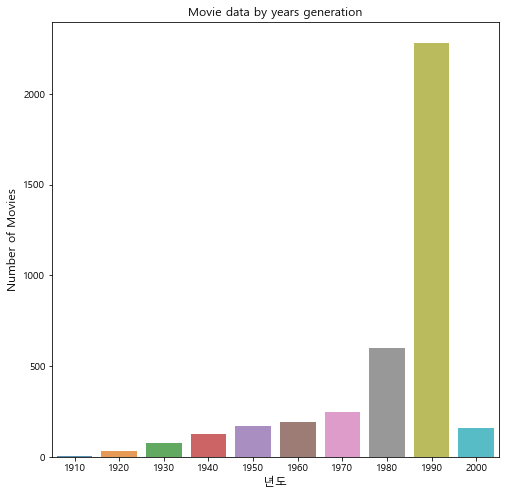

In [98]:
# 연대별 그래프 출력 - seaborn은 matplotlib보다 간결함,시각적으로 더 좋음
# seaborn as sns은 matplotlib함께 import 해야 함.
sns.barplot(moview_year_term.index, moview_year_term.values, alpha=0.8)
plt.title('Movie data by years generation')
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('년도', fontsize=12)
plt.show()

[장르의 속성 탐색]

In [99]:
movie_data.head()

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,Father of the Bride Part II (1995),Comedy,1995,1990


In [100]:
# Action이 포함되어 있는 영화 : 503개
movie_data[movie_data['genre'].str.contains('Action')]

,movie_id,title,genre,year,year_term
5,6,Heat (1995),Action|Crime|Thriller,1995,1990
8,9,Sudden Death (1995),Action,1995,1990
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,1990
14,15,Cutthroat Island (1995),Action|Adventure|Romance,1995,1990
19,20,Money Train (1995),Action,1995,1990
...,...,...,...,...,...
3807,3877,Supergirl (1984),Action|Adventure|Fantasy,1984,1980
3809,3879,Art of War The (2000),Action,2000,2000
3819,3889,Highlander: Endgame (2000),Action|Adventure|Fantasy,2000,2000
3828,3898,Bait (2000),Action|Comedy,2000,2000


In [101]:
# 장르에서 Action만 있는 것 : 65개 , 포함되어 있는 것 : 503개
data = movie_data['genre'].apply( lambda x: x=='Action' )
movie_data[data]

,movie_id,title,genre,year,year_term
8,9,Sudden Death (1995),Action,1995,1990
19,20,Money Train (1995),Action,1995,1990
70,71,Fair Game (1995),Action,1995,1990
143,145,Bad Boys (1995),Action,1995,1990
202,204,Under Siege 2: Dark Territory (1995),Action,1995,1990
...,...,...,...,...,...
3564,3633,On Her Majesty's Secret Service (1969),Action,1969,1960
3566,3635,Spy Who Loved Me The (1977),Action,1977,1970
3570,3639,Man with the Golden Gun The (1974),Action,1974,1970
3700,3769,Thunderbolt and Lightfoot (1974),Action,1974,1970


In [102]:
# 가장 많이 사용된 장르의 조합을 출력. (Top 10)
movie_data['genre'].value_counts()[:10]

Drama             843
Comedy            521
Horror            178
Comedy|Drama      162
Comedy|Romance    142
Drama|Romance     134
Documentary       116
Thriller          101
Action             65
Drama|Thriller     63
Name: genre, dtype: int64

In [103]:
# 영화장르별 개수 추출 (예시 : Drama)
unique_genre_dict = {}
# 1개 행씩 가져오기
for index, row in movie_data.iterrows():
    # genre 피처를 ‘|’ 구분자로 분리.
    genre_combination = row['genre']
    #list타입
    parsed_genre = genre_combination.split("|")
    
    # 구분자로 분리한 장르의 속성을 unique_genre_dict에 각각 계산하여 저장합니다.
    for genre in parsed_genre:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1
            
print(unique_genre_dict)

{'Animation': 105, "Children's": 251, 'Comedy': 1200, 'Adventure': 283, 'Fantasy': 68, 'Romance': 471, 'Drama': 1603, 'Action': 503, 'Crime': 211, 'Thriller': 492, 'Horror': 343, 'Sci-Fi': 276, 'Documentary': 127, 'War': 143, 'Musical': 114, 'Mystery': 106, 'Film-Noir': 44, 'Western': 68}


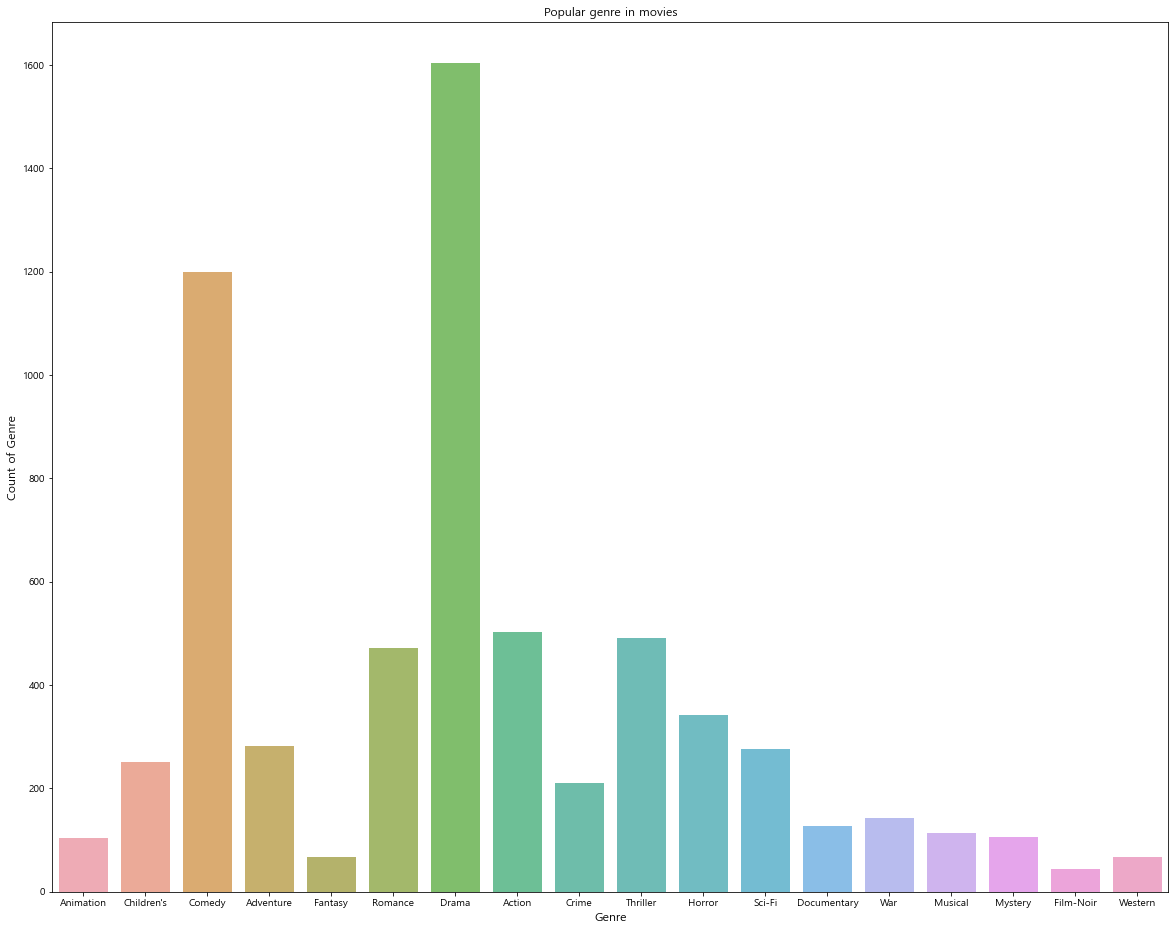

In [104]:
# unique_genre_dict를 이용하여 장르의 속성을 그래프로 출력.
# rcParams["figure.figsize"] (가로 길이, 세로길이) 로 구성
plt.rcParams['figure.figsize'] = [20, 16]
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha=0.8)
plt.title('Popular genre in movies')
plt.ylabel('Count of Genre', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.show()

[분석할 유저의 정보 탐색하기]

In [105]:
# 유저의 수를 탐색.
print("전체회원 수 :", len(user_data['user_id'].unique()))

전체회원 수 : 6040


In [106]:
# 전체 영화 수 : 3883
len(movie_data)

3883

[미니 퀴즈 - 3.4]
1. 유저 데이터에 대한 탐색적 데이터 분석을 실행해 봅시다. 

2. 아래의 질문들에 답해보세요.
- 유저의 성별 탐색
- 유저의 연령대 탐색

In [107]:
user_data['gender'].value_counts()

M    4331
F    1709
Name: gender, dtype: int64

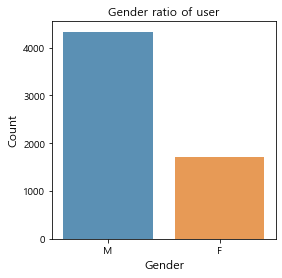

In [108]:
# 유저의 성별을 탐색합니다.
plt.rcParams['figure.figsize'] = [4, 4]
user_gender = user_data['gender'].value_counts()
sns.barplot(user_gender.index, user_gender.values, alpha=0.8)
plt.title('Gender ratio of user')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

In [109]:
# 유저의 연령으로 탐색.
user_data['age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

In [110]:
# 10대,20대... 인원수
def age_classification(age):
    if age == 1:
        return 'outlier'
    else:
        return str(age)[0] + "0"

# 예시> 25 -> 2+"0" : 20
user_data['ages'] = user_data['age'].apply(lambda x: age_classification(x))
user_ages = user_data['ages'].value_counts()
user_ages

20         2096
30         1193
10         1103
50          876
40          550
outlier     222
Name: ages, dtype: int64

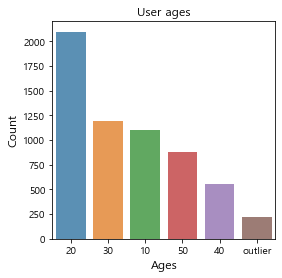

In [111]:
sns.barplot(user_ages.index, user_ages.values, alpha=0.8)
plt.title('User ages')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Ages', fontsize=12)
plt.show()

[평점 데이터의 정보 탐색하기]

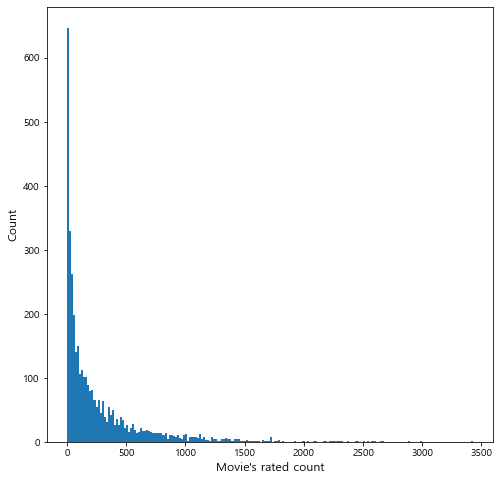

In [112]:
# 각 영화들이 평가받은 횟수 그래프 출력.
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.hist(movie_rate_count, bins=200)
plt.ylabel('Count', fontsize=12)
plt.xlabel("Movie's rated count", fontsize=12)
plt.show()

In [113]:
# movie_rate_count : 영화평점 받은 개수
print("총 영화 개수 :", len(movie_data['movie_id'].unique()))
print("평점을 받은 개수가 100개이하 수  :", len(movie_rate_count[movie_rate_count < 100]))

총 영화 개수 : 3883
평점을 받은 개수가 100개이하 수  : 1687


In [114]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [115]:
# 영화별 평점입력개수, 평균 평점. rated_count
movie_grouped_rating_info = rating_data.groupby("movie_id")['rating'].agg(['count','mean'])
movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']
movie_grouped_rating_info.head(5)

,rated_count,rating_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757


<AxesSubplot:>

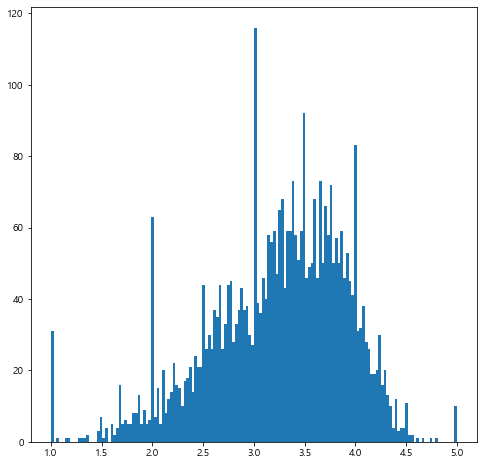

In [116]:
# 평균평점 그래프 출력 - bins:막대그래프 수 150개
movie_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)

In [117]:
movie_grouped_rating_info.head(2)

,rated_count,rating_mean
movie_id,,
1,2077,4.146846
2,701,3.201141


In [118]:
# 100번 이상의 평가를 받은 영화 중, 평점이 높은 10개의 영화를 출력.
# movie_grouped_rating_info 컬럼 3개 : movie_id,rated_count,rating_mean
# merge 병합: movie_id기준으로 movie_grouped_rating_info에 있는 것은 모두 적용
merged_data = movie_grouped_rating_info.merge(movie_data, on=['movie_id'], how='left')
# 평점받은 개수가 100개 이상이면서, 평균평점 상위 10개 출력
merged_data[merged_data['rated_count'] > 100][['rating_mean', 'title']].nlargest(10, 'rating_mean')

,rating_mean,title
1839,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,4.554558,Shawshank Redemption The (1994)
802,4.524966,Godfather The (1972)
708,4.520548,Close Shave A (1995)
49,4.517106,Usual Suspects The (1995)
513,4.510417,Schindler's List (1993)
1066,4.507937,Wrong Trousers The (1993)
861,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,4.477725,Raiders of the Lost Ark (1981)
843,4.476190,Rear Window (1954)


[미니 퀴즈 - 3.5]

동일한 방식으로, 유저 그룹 단위의 평점 속성을 분석해 보세요.
* 유저별로 평가한 영화 개수
* 유저별로 평가한 평균 영화 점수
* 유저별로 평가한 영화 점수의 편차

In [119]:
rating_data.columns

Index(['user_id', 'movie_id', 'rating', 'time'], dtype='object')

In [120]:
# 유저별 영화 평가를 탐색합니다.
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg(['count','mean', 'std'])
user_grouped_rating_info.columns = ['rated_count', 'rating_mean', 'rating_std']
user_grouped_rating_info.head()

,rated_count,rating_mean,rating_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699


<AxesSubplot:>

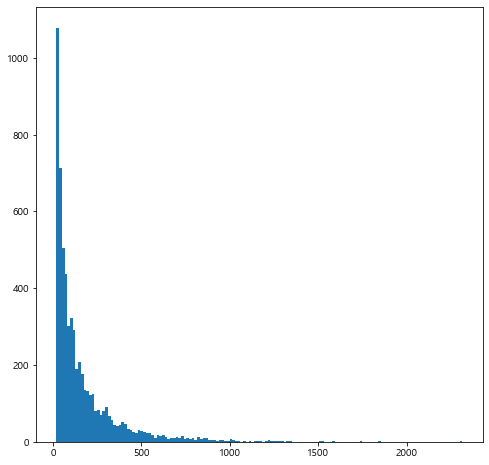

In [121]:
# 유저별로 평가한 영화 개수의 분포를 출력합니다.
user_grouped_rating_info['rated_count'].hist(bins=150, grid=False)

<AxesSubplot:>

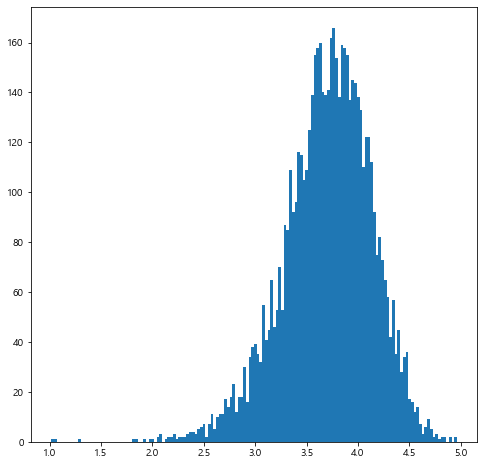

In [122]:
# 유저별로 평가한 영화 점수 평균의 분포를 그래프로 출력합니다.
user_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)

<AxesSubplot:>

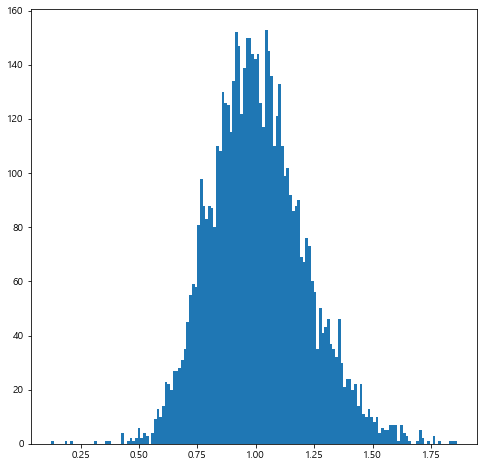

In [123]:
# 유저별로 평가한 영화 점수 편차의 분포를 그래프로 출력합니다.
user_grouped_rating_info['rating_std'].hist(bins=150, grid=False)

[user-movie 형태의 테이블로 살펴보기]

In [124]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [125]:
# unstack() 함수로 user_id, movie_id를 축으로 하는 데이터를 생성.
# unstack() user_id:index, movie_id:column으로 지정
rating_table = rating_data[['user_id', 'movie_id', 'rating']].set_index(["user_id", "movie_id"]).unstack()
rating_table.head(10)

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6           4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
7           NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
8           4.0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
9           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10          5.0  5.0  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9         NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  
10        NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  

[10 rows x 3706 columns]

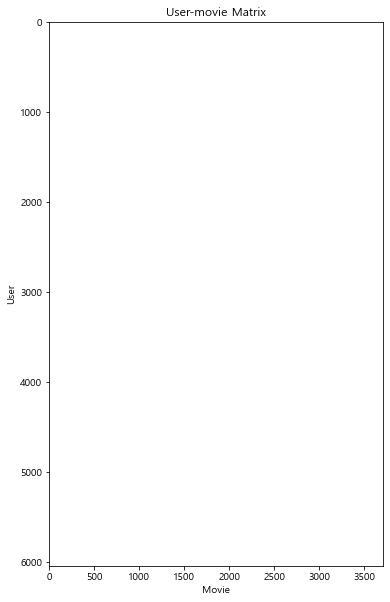

In [126]:
# user-movie 테이블을 시각화(X 할필요 없음)
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel("Movie")
plt.ylabel("User")
plt.title("User-movie Matrix")
plt.show()

<Step3. 예측> : 수학적 기법을 활용한 평점 예측

[SVD를 활용한 빈칸 채우기]
 * 아래 코드 실행을 위해 Terminal에서 아래와 같은 패키지를 설치
 * (env_name) pip install surprise

In [127]:
# https://autumnrain.tistory.com/entry/scikit-surprise-install-%EC%84%A4%EC%B9%98
#  error: Microsoft Visual C++ 14.0 설치필요
# 설치후 pip install surprise 다시 설치
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
# 과학적 표기법 억제 # 1.500e-10 .500e+00  -> 0. 1.5 
np.set_printoptions(suppress=True)


실습

In [128]:
# 데이터 프레임을 생성합니다.
ratings_dict = {'item_id': [1,2,3,1,2,3,2],
                'user_id': ['a','a','a','b','b','b','c'],
                'rating': [2,4,4,2,5,4,5]}
df = pd.DataFrame(ratings_dict)
df.head(10)

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [129]:
# 데이터 프레임을 행렬로 변환하여 확인합니다.
df_matrix_table = df[['user_id', 'item_id', 'rating']].set_index(["user_id", "item_id"]).unstack().fillna(0)
df_matrix_table.head(10)

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          0.0  5.0  0.0

SVD를 이용한 빈칸 채우기 학습
* 예제를 가지고 실습

In [130]:
rating_data.head(3)

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


예제 - 실제파일과 같은 타입형태로 예제구성

In [131]:
# SVD 사용을 위한 데이터셋을 생성.
# 평점범위지정 1-5점
reader = Reader(rating_scale=(1, 5))
# 데이터를 surprise의 Dataset 형식으로 변환
data = Dataset.load_from_df(df=df[["user_id", "item_id", "rating"]], reader=reader)
# 행렬완성 데이터셋으로 변경
train_data = data.build_full_trainset()

In [132]:
# SVD 모델훈련.
model = SVD(n_factors=8,  ## n_factors : 잠재요인의 크기
            lr_all=0.005, ## 모든 파리미터 학습 비율
            reg_all=0.02, ## 모든 파라미터 정규화 정도
            n_epochs=10)
model.fit(train_data)

In [133]:
# 학습한 모델을 기반으로 빈공간의 점수를 예측.

"""
build_anti_testset() : 
학습에 사용된 matrix에서 0으로 평가되어 있는(rating이 0인 지점) 부분의 데이터.
user 혹은 item은 학습에 반드시 등장한 적이 있어야 한다는 전제조건을 통해 추출.
"""

# train_data : 평점데이터(부여된것과 부여되지 않은 것)
# test_data : 학습에 사용된 유저, 혹은 아이템이지만 점수는 매겨지지 않은 데이터.
# build_anti_testset() : 행렬의 채워져 있지 않는(0.0으로 되어 있는) 값만 가져옴
test_data = train_data.build_anti_testset()
# 채워지지 않은 곳에 예측값 가져옴.
predictions = model.test(test_data)

# 아래의 결과는 빈공간(test_data)의 점수를 예측한 결과입니다.
for _, iid, _, predicted_rating, _ in predictions:
    print("Item id", iid, "|", "예측값 :", predicted_rating)

Item id 1 | 예측값 : 3.595180853282327
Item id 3 | 예측값 : 3.859607139063828


실습 : 모든값 예측

실제값 , 예측값 모두 출력

In [134]:
# 채워진 평점의 예측을 해서 나온 평점 출력
# 기존 평점과 비교
"""
build_testset() : 

학습에 사용된 matrix에서 0으로 평가되어 있는(rating이 0인 지점) 부분의 데이터.
user 혹은 item은 학습에 반드시 등장한 적이 있어야 한다는 전제조건을 통해 추출.
"""
# build_testset() : 행렬의 채워져 있는 값 예측
test_data = train_data.build_testset()
predictions = model.test(test_data)

# 원래부터 비어있지 않았던 행렬의 값들을 출력한 것입니다. 
# r_ul:real rating은 원래 값, predicted_rating :행렬 완성 후 예측된 값
# uid, mid, rating, predicted_rating, _ 
for _, iid, r_ui, predicted_rating, _ in predictions:
    print("Item id", iid, "|", "실제값(평점) :", r_ui, "|", "예측값 :", predicted_rating)

Item id 1 | 실제값(평점) : 2.0 | 예측값 : 3.478889306364745
Item id 2 | 실제값(평점) : 4.0 | 예측값 : 3.796365830512615
Item id 3 | 실제값(평점) : 4.0 | 예측값 : 3.6769673511377436
Item id 1 | 실제값(평점) : 2.0 | 예측값 : 3.5561817904690276
Item id 2 | 실제값(평점) : 5.0 | 예측값 : 3.862599988002255
Item id 3 | 실제값(평점) : 4.0 | 예측값 : 3.7611037826260287
Item id 2 | 실제값(평점) : 5.0 | 예측값 : 3.9533789205096577


실제 학습 적용

[아직 평가하지 않은 영화의 점수 예측하기]
* MovieLens 데이터에 SVD 적용하기

In [135]:
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성
# 평점 1-5점
reader = Reader(rating_scale=(1, 5))
# 데이터를 surprise의 Dataset 객체 변환
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
# 행렬완성 학습데이터 변경
train_data = data.build_full_trainset()

# SVD 모델을 학습합니다.
# https://cypision.github.io/machine-learning/Recommender_with_Surprise_Basic03/
# GridSearchCV 교차거므증 최적화 가능
# param_grid = {'n_epochs': [20,40,60], 'n_factors': [50,100,200]}
# gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mse'], cv=3)

train_start = time.time() # 시작시간
model = SVD(n_factors=8,  ##  잠재 요인 K의 크기를 지정
            lr_all=0.005, ## 모든 파라미터에 대한 학습률. Default 0.005.
            reg_all=0.02, ## 모든 파리미터에 대한 정규화 구간. Default 0.02.
            n_epochs=100) ## 반복횟수
model.fit(train_data)
train_end = time.time()  # 끝난 시간
print("모델 훈련시간: %.2f 초" % (train_end - train_start))

모델 훈련시간: 65.35 초


테스트 user_id 선정 : user_id = 4

영화의 점수를 예측할 타겟 유저 선정

In [136]:
# user_id가 4인 유저의 영화 평가 데이터 검색.
target_user_id = 4
# 4번이 평가한 영화 데이터
target_user_data = rating_data[rating_data['user_id']==target_user_id]
target_user_data.head(2)

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924


user_id=4 평점이 있는 영화 저장

In [137]:
# user_id 4인 유저가 평가한 영화 히스토리 정보를 추출.
# movie_id : 평점 으로 dic타입 저장
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
            
print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


타겟 유저가 보지 않은 영화 중, 예상 평점이 높은 10개 선정

In [138]:
# 타겟 유저(user_id가 4인 유저)가 보지 않은 영화 정보를 테스트 데이터로 생성.
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    # target_user_movie_rating_dict : movie_id는 평점이 입력된 영화만 있음
    if movie_id in target_user_movie_rating_dict:
        continue
    # 그렇지 않으면 test_data에 저장
    test_data.append((target_user_id, movie_id, rating))

In [139]:
# 평점이 없는 데이터만 출력
test_data[:5]

[(4, 1, 0), (4, 2, 0), (4, 3, 0), (4, 4, 0), (4, 5, 0)]

In [140]:
# 타겟 유저의 평점 점수를 예측.
# user_id,movie_id,rating,predicted_rating 이 존재
target_user_predictions = model.test(test_data)

# 예측된 점수 중, 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장합니다.
# predictions : 예측점수가 포함, user_history:평점이 된 영화
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    # user_id:uid, movie_id:mid, predicted_rating:예측평점
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            # 영화평점을 한것만 저장되어 있음.
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

# target_user_predictions : 평점이 없는 영화에 예측평점이 들어가 있음.
target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions, 
                                                            user_id=target_user_id, 
                                                            user_history=target_user_movie_rating_dict)

In [141]:
# target_user_movie_predict_dict에서 예측된 점수 중, 타겟 유저의 Top 10 영화를 선정
# key : 기준으로 정렬 movie_id,rating 평점기준으로 정렬
# reverse : 역순정렬
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(), 
                                     key=operator.itemgetter(1), reverse=True)[:10]

In [142]:
# 예측된 Top 10 영화
target_user_top10_predicted

[(106, 5),
 (326, 5),
 (527, 5),
 (602, 5),
 (608, 5),
 (750, 5),
 (858, 5),
 (912, 5),
 (922, 5),
 (923, 5)]

In [143]:
movie_data[:3]

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990


In [144]:
# 타이틀 정보로 출력하기 위해 movie_id마다 movie_title을 딕셔너리 형태로 저장.
movie_dict = {}
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title

In [145]:
target_user_top10_predicted[:3]

[(106, 5), (326, 5), (527, 5)]

In [146]:
# 앞서 계산한 Top 10 영화에 movie_title을 매핑하여 출력합니다.
# target_user_top10_predicted : (movie_id,rating)
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    # 예측평점
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], ":", predicted_rating)

Nobody Loves Me (Keiner liebt mich) (1994) : 5
To Live (Huozhe) (1994) : 5
Schindler's List (1993) : 5
Great Day in Harlem  A (1994) : 5
Fargo (1996) : 5
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) : 5
Godfather  The (1972) : 5
Casablanca (1942) : 5
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) : 5
Citizen Kane (1941) : 5


In [147]:
target_user_movie_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

In [148]:
# 타겟 유저의 기존 선호 영화와 비교.
# target_user_movie_rating_dict : (movie_id,rating)
target_user_top10_real = sorted(target_user_movie_rating_dict.items(), 
                                key=operator.itemgetter(1),reverse=True)[:10]
for real in target_user_top10_real:
    movie_id = real[0]
    real_rating = real[1]
    print(movie_dict[movie_id], ":", real_rating)

Hustler  The (1961) : 5
Star Wars: Episode IV - A New Hope (1977) : 5
Saving Private Ryan (1998) : 5
Raiders of the Lost Ark (1981) : 5
Rocky (1976) : 5
Jaws (1975) : 5
Good  The Bad and The Ugly  The (1966) : 5
Run Lola Run (Lola rennt) (1998) : 5
Goldfinger (1964) : 5
Terminator  The (1984) : 5


### <Step4. 평가> : 예측 모델 평가하기

[예측 모델의 평가 방법]
* RMSE 계산 (평균제곱근오차)

In [149]:
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성합니다. 
# 학습 데이터와 테스트 데이터를 8:2로 분할합니다.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

# SVD 모델을 학습합니다.
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=100)
model.fit(train_data)
train_end = time.time()
print("모델훈련 시간: %.2f 초" % (train_end - train_start))

predictions = model.test(test_data)

# 테스트 데이터의 RMSE를 출력합니다.
print("[ SVD모델 데이터셋 RMSE ]")
accuracy.rmse(predictions)

모델훈련 시간: 63.44 초
[ SVD모델 데이터셋 RMSE ]
RMSE: 0.8576


0.8576255248502959

[실제 평점과의 비교 시각화]

* 평점 예측 단계

In [150]:
movie_data.head(2)

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990


In [151]:
# target_user_movie_rating_dict
# {3468: 5,
#  1210: 3,
#  2951: 4,
#  1214: 4,

In [152]:
# 타겟 유저 정보를 테스트 데이터로 생성
# 
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    # 평점이 있는 영화 검색후 test_data 저장
    if movie_id in target_user_movie_rating_dict:
        rating = target_user_movie_rating_dict[movie_id]
        test_data.append((target_user_id, movie_id, rating))

In [153]:
# 평점이 있는 영화 평점예측. (실제평점,예측평점 비교)
target_user_predictions = model.test(test_data)

# 예측된 점수 중, 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장.
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

# target_user_movie_predict_dict에서 예측된 점수 중, 타겟 유저의 Top 10 영화를 선정합니다.
# target_user_predictions : 평점이 있는 영화 평점예측
# target_user_movie_rating_dict : 유저가 평가한 영화
target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions, 
                                                            user_id=target_user_id, 
                                                            user_history=target_user_movie_rating_dict)

In [154]:
# 타겟 예측평점
target_user_movie_predict_dict

{260: 4.08849492023039,
 480: 3.585012425421055,
 1036: 4.326124739885392,
 1097: 4.179693455405195,
 1196: 3.7669647343282207,
 1198: 4.503407548990621,
 1201: 4.639898261923146,
 1210: 3.4535901336871526,
 1214: 4.242570137097889,
 1240: 4.282645200422148,
 1387: 4.502439266296318,
 1954: 4.378465439382629,
 2028: 4.555255991815626,
 2366: 4.098666782682388,
 2692: 4.181024935206077,
 2947: 4.276331483880583,
 2951: 4.473422051514191,
 3418: 4.330499656845153,
 3468: 4.894594016488007,
 3527: 3.314634519107983,
 3702: 3.8032063047016402}

In [155]:
# 예측 점수와 실제 점수를 영화 타이틀에 매핑.
origin_rating_list = []
predicted_rating_list = []
movie_title_list = []
idx = 0
# target_user_movie_predict_dict : ( movie_id,예측평점 )
for movie_id, predicted_rating in target_user_movie_predict_dict.items():
    idx = idx + 1
    # 예측평점 소수점2자리
    predicted_rating = round(predicted_rating, 2)
    # 실제평점
    origin_rating = target_user_movie_rating_dict[movie_id]
    # 영화번호
    movie_title = movie_dict[movie_id]
    print("movie", str(idx), ":", movie_title, "-", origin_rating, "/", predicted_rating)
    origin_rating_list.append(origin_rating)
    predicted_rating_list.append(predicted_rating)
    movie_title_list.append(str(idx))

movie 1 : Star Wars: Episode IV - A New Hope (1977) - 5 / 4.09
movie 2 : Jurassic Park (1993) - 4 / 3.59
movie 3 : Die Hard (1988) - 4 / 4.33
movie 4 : E.T. the Extra-Terrestrial (1982) - 4 / 4.18
movie 5 : Star Wars: Episode V - The Empire Strikes Back (1980) - 2 / 3.77
movie 6 : Raiders of the Lost Ark (1981) - 5 / 4.5
movie 7 : Good  The Bad and The Ugly  The (1966) - 5 / 4.64
movie 8 : Star Wars: Episode VI - Return of the Jedi (1983) - 3 / 3.45
movie 9 : Alien (1979) - 4 / 4.24
movie 10 : Terminator  The (1984) - 5 / 4.28
movie 11 : Jaws (1975) - 5 / 4.5
movie 12 : Rocky (1976) - 5 / 4.38
movie 13 : Saving Private Ryan (1998) - 5 / 4.56
movie 14 : King Kong (1933) - 4 / 4.1
movie 15 : Run Lola Run (Lola rennt) (1998) - 5 / 4.18
movie 16 : Goldfinger (1964) - 5 / 4.28
movie 17 : Fistful of Dollars  A (1964) - 4 / 4.47
movie 18 : Thelma & Louise (1991) - 4 / 4.33
movie 19 : Hustler  The (1961) - 5 / 4.89
movie 20 : Predator (1987) - 1 / 3.31
movie 21 : Mad Max (1979) - 4 / 3.8


* 결과 시각화

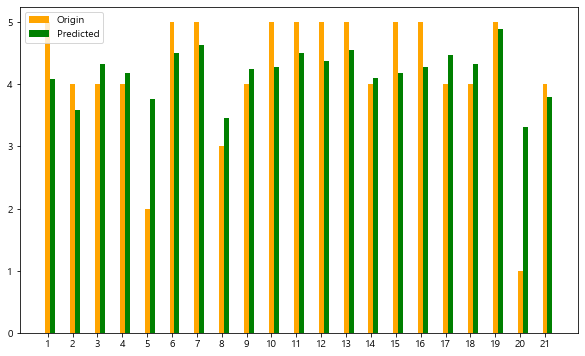

In [156]:
# 실제 점수와 예측 점수를 리스트로 추출합니다.
origin = origin_rating_list
predicted = predicted_rating_list
 
# 영화의 개수만큼 bar 그래프의 index 개수를 생성합니다.
plt.rcParams['figure.figsize'] = (10,6)
index = np.arange(len(movie_title_list))
bar_width = 0.2
 
# 실제 점수와 예측 점수를 bar 그래프로 출력합니다.
rects1 = plt.bar(index, origin, bar_width,
                 color='orange',
                 label='Origin')
rects2 = plt.bar(index + bar_width, predicted, bar_width,
                 color='green',
                 label='Predicted')
plt.xticks(index, movie_title_list)
plt.legend()
plt.show()